In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
! ls

cifar10  sample_data


In [0]:
import os 
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

In [44]:
# Download Dataset
dataset_url = 'http://files.fast.ai/data/cifar10.tgz'
download_url(dataset_url, 'sample_data')

Using downloaded and verified file: sample_data/cifar10.tgz


In [0]:
with tarfile.open('sample_data/cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path='cifar10/data')

In [46]:
data_dir = 'cifar10/data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'train', 'labels.txt']
['ship', 'deer', 'automobile', 'dog', 'airplane', 'horse', 'frog', 'truck', 'bird', 'cat']


In [0]:
# ImageFolder class enable to work with directory structure, one folder per class, used by many computer vision datasets 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [0]:
dataset = ImageFolder(data_dir+'/train',transform=ToTensor())

In [49]:
img,label = dataset[100]
print(img.shape,label)

torch.Size([3, 32, 32]) 0


In [50]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


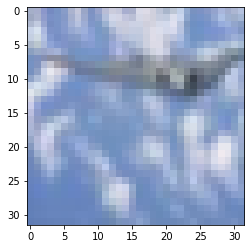

In [51]:
plt.imshow(img.permute(1,2,0)) #Permute changes the dimension

In [52]:
type(img)

torch.Tensor

### Training and Validation Datasets

In [0]:
def split_indices(n,val_pct):
  # Determing size of validaton set
  n_val = int(val_pct*n)
  # Create Random permutations of 0 to n-1
  idxs = np.random.permutation(n)
  # Pick first n_val indices for validation set
  return idxs[n_val:],idxs[:n_val]

In [0]:
train_indicies, val_indicies = split_indices(len(dataset),val_pct=0.2)

In [0]:
batch_size = 100
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

#Training sampler and dataloader
train_sampler = SubsetRandomSampler(train_indicies)
train_loader = DataLoader(dataset,batch_size,sampler=train_sampler)

#Validation smapler and dataloader
val_sampler = SubsetRandomSampler(val_indicies)
val_loader = DataLoader(dataset,batch_size,sampler=val_sampler)

In [0]:
from torchvision.utils import make_grid
def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(16,16))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images[:100],10).permute(1,2,0))
    break

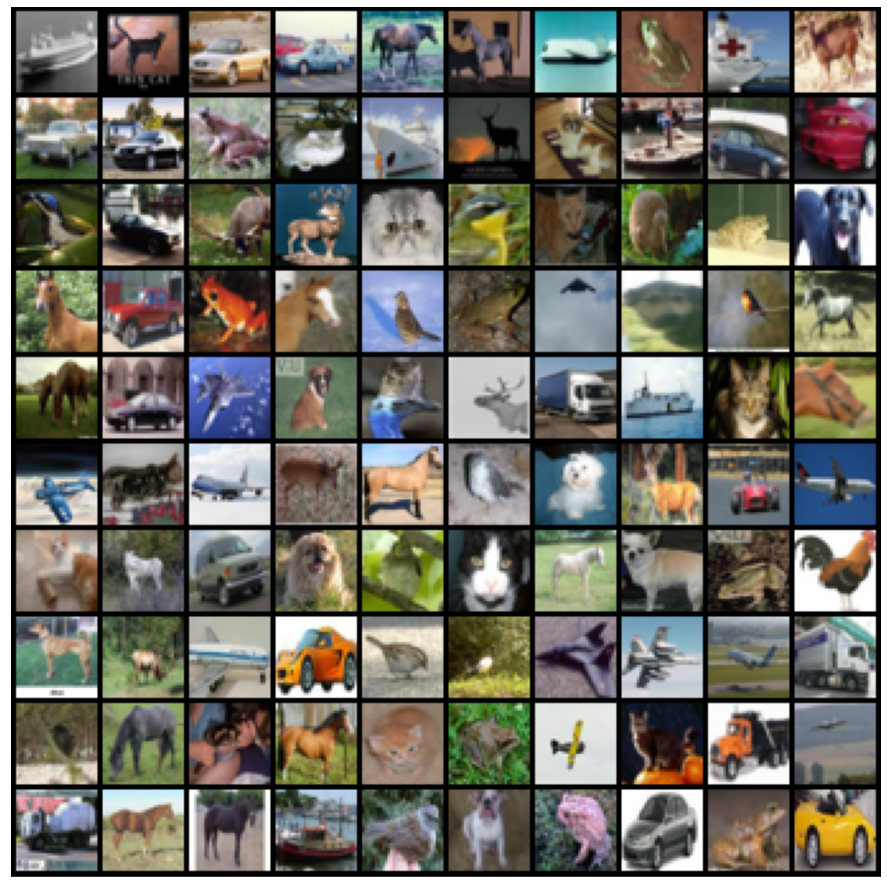

In [59]:
show_batch(train_loader)

#### Single Convolution layer

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
simple_model = nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2)
)

In [18]:
for images,label in train_loader:
  print('images shape:',images.shape)
  out = simple_model(images)
  print('Feature Map Shape:', out.shape)
  break

images shape: torch.Size([100, 3, 32, 32])
Feature Map Shape: torch.Size([100, 8, 16, 16])


### Model

In [0]:
model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #Output: bs x 16 x 16 x 16
    
    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #Output: bs x 16 x 8 x 8
    
    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #Output: bs x 16 x 4 x 4

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #Output: bs x 16 x 2 x 2

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #Output: bs x 16 x 1 x 1

    nn.Flatten(), #Output: bs x 16

    nn.Linear(16,10), #Output: bs x 10

    nn.Softmax(dim=1)
)

In [20]:
for t in model.parameters():
  print(t)

Parameter containing:
tensor([[[[ 0.1068,  0.0670, -0.1218],
          [ 0.0722,  0.1451,  0.0113],
          [-0.1510, -0.0843, -0.1307]],

         [[-0.1799, -0.0669, -0.1671],
          [ 0.0758, -0.0780, -0.1286],
          [-0.0145, -0.0709,  0.1210]],

         [[-0.0952,  0.0075,  0.0910],
          [-0.0334, -0.0605, -0.0766],
          [-0.1516,  0.0981,  0.1625]]],


        [[[ 0.1740,  0.0229, -0.0336],
          [ 0.1490,  0.1051, -0.1241],
          [ 0.0388,  0.1227, -0.1075]],

         [[-0.0763,  0.0422,  0.0805],
          [-0.0297, -0.0031,  0.1835],
          [-0.0439, -0.1341,  0.0194]],

         [[ 0.0006,  0.0365, -0.1569],
          [ 0.0813, -0.0529, -0.0877],
          [-0.1879, -0.0640,  0.0415]]],


        [[[-0.1038,  0.0957,  0.0080],
          [ 0.0562, -0.1219,  0.1504],
          [-0.1682, -0.0523,  0.1910]],

         [[-0.0100,  0.0261, -0.0934],
          [-0.1751, -0.0625, -0.1106],
          [ 0.0621,  0.1629,  0.1087]],

         [[-0.1214, -0

In [21]:
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten()
  (16): Linear(in_features=16, out_features=10, bias=True)
  (17): Softmax(dim=1)
)

In [22]:
for images, labels in train_loader:
  outputs = model(images)
  loss = F.cross_entropy(outputs,labels)
  print('Loss:', loss.item())
  break

Loss: 2.3000528812408447


### On GPU

In [0]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [24]:
device = get_default_device()
device

device(type='cuda')

In [0]:
def to_device(data,device):
  """Funciton that can move data to choosen device"""
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device, non_blocking=True)

In [26]:
for images, labels in train_loader:
  print(images.shape)
  images = to_device(images,device)
  print(images.device)
  break

torch.Size([100, 3, 32, 32])
cuda:0


In [0]:
class DeviceDataLoader():
  """ Wrap a data loader to move data to a device """
  
  def __init__ (self,dl,device):
    self.dl = dl
    self.device = device
  
  def __iter__(self):
    """ Yield a batch of data after moving it to a device """
    for b in self.dl:
      yield to_device(b,self.device)
  
  def __len__(self):
    """ Number of batches """
    return len(self.dl)

In [0]:
train_dl = DeviceDataLoader(train_loader,device)
valid_dl = DeviceDataLoader(val_loader,device)

### Train Model

In [0]:
def loss_batch(model,loss_fn,xb,yb,opt=None,metric=None):
  preds = model(xb)
  loss = loss_fn(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  
  metric_result = None
  
  if metric is not None:
    metric_result = metric(preds,yb)
  
  return loss.item(),len(xb),metric_result

In [0]:
#Evaluation Metric not Loss function
def accuracy(output,labels):
  _, preds = torch.max(output,dim=1)
  return torch.sum(preds == labels).item()/len(preds)

In [0]:
def evaluate(model,loss_fn,valid_dl,metric=None):
  with torch.no_grad():
    #Pass each batch through the model
    results = [loss_batch(model,loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]
    #Seperate losses, counts and metrics
    losses, nums, metrics = zip(*results)
    #Total size of the dataset
    total = np.sum(nums)
    #Avg. loss across batches
    avg_loss = np.sum(np.multiply(losses,nums))/total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics,nums))/total
  return avg_loss, total, avg_metric

In [32]:
loss_fn = F.cross_entropy
print(evaluate(model,loss_fn,val_loader,metric=accuracy))

(2.302690770626068, 10000, 0.1035)


In [0]:
learning_rate = 0.005
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [0]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
  train_losses, val_losses, val_metrics = [],[],[]
  for epoch in range(epochs):
    #Training
    model.train()
    for xb,yb in train_dl:
      train_loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
    #Evaluation
    model.eval()
    result = evaluate(model,loss_fn,valid_dl,metric)
    val_loss, total, val_metric = result

    #Appending
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_metrics.append(val_metric)
    #Print progress
    if metric is None:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1,epochs,val_loss))
    else:
      print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))
  return train_losses, val_losses, val_metrics

In [35]:
history = fit(7,model,loss_fn,optimizer,train_loader,val_loader,accuracy)

Epoch [1/7], Loss: 2.1692, accuracy: 0.2806
Epoch [2/7], Loss: 2.1258, accuracy: 0.3234
Epoch [3/7], Loss: 2.0913, accuracy: 0.3615
Epoch [4/7], Loss: 2.0809, accuracy: 0.3734
Epoch [5/7], Loss: 2.0898, accuracy: 0.3666
Epoch [6/7], Loss: 2.0676, accuracy: 0.3879
Epoch [7/7], Loss: 2.0693, accuracy: 0.3881


In [0]:
train_losses, val_losses, val_metrics = history

In [37]:
train_losses, val_losses, val_metrics

([2.1256930828094482,
  2.1609957218170166,
  2.1129910945892334,
  2.099987268447876,
  2.037814140319824,
  2.090317964553833,
  2.0263912677764893],
 [2.1692006945610047,
  2.1258468222618103,
  2.091319181919098,
  2.0808926010131836,
  2.0897791838645934,
  2.0676464104652403,
  2.069277116060257],
 [0.2806, 0.3234, 0.3615, 0.3734, 0.3666, 0.3879, 0.3881])

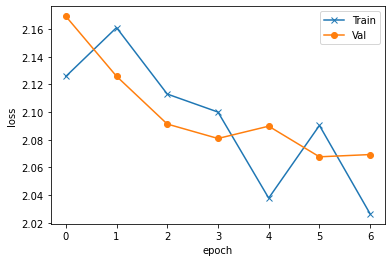

In [38]:
plt.plot(train_losses, '-x')
plt.plot(val_losses, '-o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])